# Modélisation de la migration cellulaire

On reproduit le modèle décrit par Selmeczi et al., 2005 (doi : 10.1529/biophysj.105.061150)

La cellule est pilotée par sa vitesse $\overrightarrow{v}$ par l'équation générale,

\begin{equation}
\frac{d \vec{v}}{dt} = -\int_{-\infty }^{t} K(t-t')\vec{v}(t') dt'+\sigma(v)\vec{\eta}(t)
\end{equation}

L'intégrale représente la "mémoire" de la cellule.

## I. Théorie HaCat

Les auteurs construisent un modèle pour des cellules HaCaT (source : https://en.wikipedia.org/wiki/HaCaT). Ils proposent la dynamique suivante,

\begin{equation}
\frac{d \vec{v}}{dt} = -\beta \vec{v} + \alpha^2\int_{-\infty }^{t} e^{-\gamma(t-t')}\vec{v}(t') dt'+(\sigma_0 + \sigma_1 v)\vec{\eta}(t)
\end{equation}

Il y a donc 5 paramètres : 

$\beta$ (1/h) taux de "perte de mémoire"

La "mémoire" de la cellule à un temps caractéristique $\gamma$ (1/h) et une force $\alpha^2/\gamma$ ($\alpha$ en 1/h)

L'intensité du bruit est fonction affine de la vitesse avec $\sigma_0$ (µm/h^3/2) et $\sigma_1$ (1/h^1/2)

In [126]:
# définition des paramètres

a =1.5
b =4.1
g =1.
s0=11.    
s1=1.3   

En posant $\vec{V}=\alpha\int_{-\infty }^{t} e^{-\gamma(t-t')}\vec{v}(t') dt'$, que l'on appelle la vitesse auxiliaire, résoudre l'équation de la vitesse est équivalent à résoudre les équations suivantes,

\begin{equation}
\frac{d \vec{V}}{dt} = \alpha \vec{v} - \gamma \vec{V}
\end{equation}

\begin{equation}
\frac{d \vec{v}}{dt} = -\beta \vec{v} + \alpha \vec{V} + (\sigma _0 +\sigma _1 v)\vec{\eta}
\end{equation}

\begin{equation}
\frac{d \vec{r}}{dt} = \vec{v}
\end{equation}

Le système est écrit sous forme matricielle $d\textbf{X}=\underline{\underline{A}}\textbf{X}dt + \underline{\underline{B}}(v)d\textbf{W}$,
\begin{equation}
\textbf{X}=\begin{bmatrix}
r_x \\
r_y \\
v_x \\
v_y \\
V_x \\
V_y
\end{bmatrix}, \hspace{1cm} 
\underline{\underline{A}}=\begin{bmatrix}
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & -\beta & 0 & \alpha & 0 \\
0 & 0 & 0 & -\beta & 0 & \alpha \\
0 & 0 & \alpha & 0 & -\gamma & 0 \\
0 & 0 & 0 & \alpha & 0 & -\gamma
\end{bmatrix}, \hspace{1cm} 
\underline{\underline{B}}=\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \sigma_0+\sigma_1v & 0 & 0 & 0 \\
0 & 0 & 0 & \sigma_0+\sigma_1v & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
\end{equation}

In [127]:
import numpy as np

In [128]:
# définition des matrices
matA=np.array([[0., 0., 1., 0., 0., 0.],
              [0., 0., 0., 1., 0., 0.],
              [0., 0., -b, 0., a, 0.],
              [0., 0., 0., -b, 0., a],
              [0., 0., a, 0., -g, 0.],
              [0., 0., 0., a, 0., -g]
              ])
#

matB0=np.diag([0., 0., s0, s0, 0., 0.])
matB1=np.diag([0., 0., s1, s1, 0., 0.])

# temps de simulation (heures)
initial_time, final_time=0., 20.
nb_of_points=12001
tspan = np.linspace(initial_time, final_time, nb_of_points)

# initialisation des variables
r0=np.array([0., 0.])
v0=np.array([0., 0.])
V0=np.array([0., 0.])
X0=np.array([r0[0], r0[1],
             v0[0], v0[1],
             V0[0], V0[1]
             ])
#

# définition du processus stochastique
def f(x, t):
    return matA.dot(x)
#

def G(x, t):
    v=np.sqrt(np.square(x[2]) + np.square(x[3]))
    Xv=np.diag([0., 0., v, v, 0., 0.])
    return matB0+matB1.dot(Xv)
#

On utilise la méthode d'Euler-Maruyama pour résoudre ce système d'équations (source : https://github.com/mattja/sdeint).

In [129]:
import sdeint

In [130]:
#on lance des simulations

result = sdeint.itoint(f, G, X0, tspan)

In [131]:
# la trajectoire est échantillonée
n=100

#sub sampling
result_sampled=result[::n]
tspan_sampled=tspan[::n]

On fait quelques images

In [132]:
import matplotlib.pyplot as plt

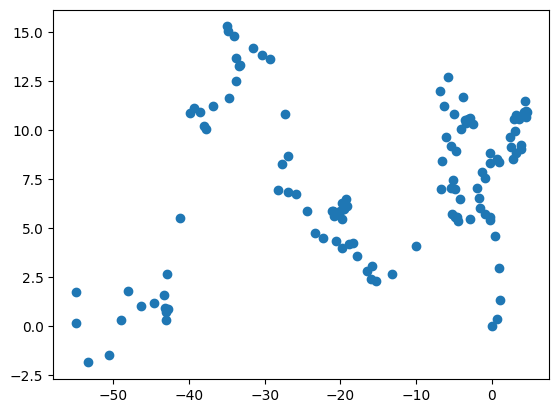

In [133]:

plt.scatter(result_sampled[:,0], result_sampled[:,1])
#plt.xlabel('Time')
#plt.legend(loc="upper right")
plt.show()